In [33]:
import pandas as pd

ta = pd.read_csv('도로교통공단_서울시 일별 시간별 교통사고 현황_20191231.csv', encoding = 'cp949')

In [34]:
ta.head()

,발생일,발생시간,발생지_시도,발생지_시군구,법정동명,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2017-01-01,0,서울,강북구,미아동,1,0,1,6,0
1,2017-01-01,0,서울,노원구,상계동,1,0,0,1,0
2,2017-01-01,0,서울,동작구,상도동,1,0,0,1,0
3,2017-01-01,0,서울,서초구,서초동,1,0,0,1,0
4,2017-01-01,0,서울,송파구,잠실동,1,0,0,1,0


In [35]:
ta['발생지_시군구'].unique()
label = sorted(['강북구', '노원구', '동작구', '서초구', '송파구', '양천구', '용산구', '중랑구', '강남구',
       '강동구', '강서구', '동대문구', '종로구', '금천구', '영등포구', '도봉구', '광진구', '중구',
       '관악구', '구로구', '마포구', '은평구', '서대문구', '성동구', '성북구'])

In [59]:
weights = np.linspace(1, 2, 4)
weights

array([1.        , 1.33333333, 1.66666667, 2.        ])

In [69]:
#가중치를 부여하여 부상자지수를 만든다
#사망자수, 중상자수, 경상자수, 부상신고자수 순
weights = np.linspace(1, 2, 4)
values = taa[['부상신고자수','경상자수','중상자수','사망자수']]

values['부상자지수'] = taa['부상신고자수']*weights[0] + taa['경상자수']*weights[1]+taa['중상자수']*weights[2] + taa['사망자수']*weights[3]

<ipython-input-69-9e00fddd5087>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['부상자지수'] = taa['부상신고자수']*weights[0] + taa['경상자수']*weights[1]+taa['중상자수']*weights[2] + taa['사망자수']*weights[3]


In [70]:
values.head()

,부상신고자수,경상자수,중상자수,사망자수,부상자지수
발생지_시군구,,,,,
강남구,1312,11102,2694,53,20710.666667
강동구,551,3762,1392,42,7971.000000
강북구,216,3630,1060,29,6880.666667
강서구,520,4857,1477,43,9543.666667
관악구,423,3610,1098,29,7124.333333


In [79]:
taa = ta.pivot_table(ta, index=['발생지_시군구'], aggfunc=np.sum)
taa = taa.drop('발생시간', axis = 1)

In [39]:
taa['사고건수'].sort_values(ascending=False).head()

발생지_시군구
강남구     10650
송파구      8510
영등포구     7318
서초구      7257
마포구      5024
Name: 사고건수, dtype: int64

In [40]:
taa['사망자수'].sort_values(ascending=False).head()

발생지_시군구
송파구     63
영등포구    55
동대문구    54
서초구     53
강남구     53
Name: 사망자수, dtype: int64

In [41]:
taa['중상자수'].sort_values(ascending=False).head()

발생지_시군구
강남구     2694
송파구     2369
서초구     1938
영등포구    1912
동대문구    1689
Name: 중상자수, dtype: int64

In [42]:
taa['부상신고자수'].sort_values(ascending=False).head()

발생지_시군구
송파구     1442
강남구     1312
영등포구    1010
서초구      911
동작구      695
Name: 부상신고자수, dtype: int64

In [43]:
taa['경상자수'].sort_values(ascending=False).head()

발생지_시군구
강남구     11102
송파구      7929
서초구      7869
영등포구     7580
마포구      5381
Name: 경상자수, dtype: int64

In [ ]:
#강남, 송파, 영등포, 서초

In [17]:
# ta['부상자수'] = ta['중상자수'] + ta['경상자수'] + ta['부상신고자수']

In [18]:
# ta_acc = ta.groupby(['발생지_시군구'])['사고건수'].sum()
# ta_injury = ta.groupby(['발생지_시군구'])['부상자수'].sum()

In [3]:
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
from mlxtend.plotting import heatmap

(0.0, 25000.0)

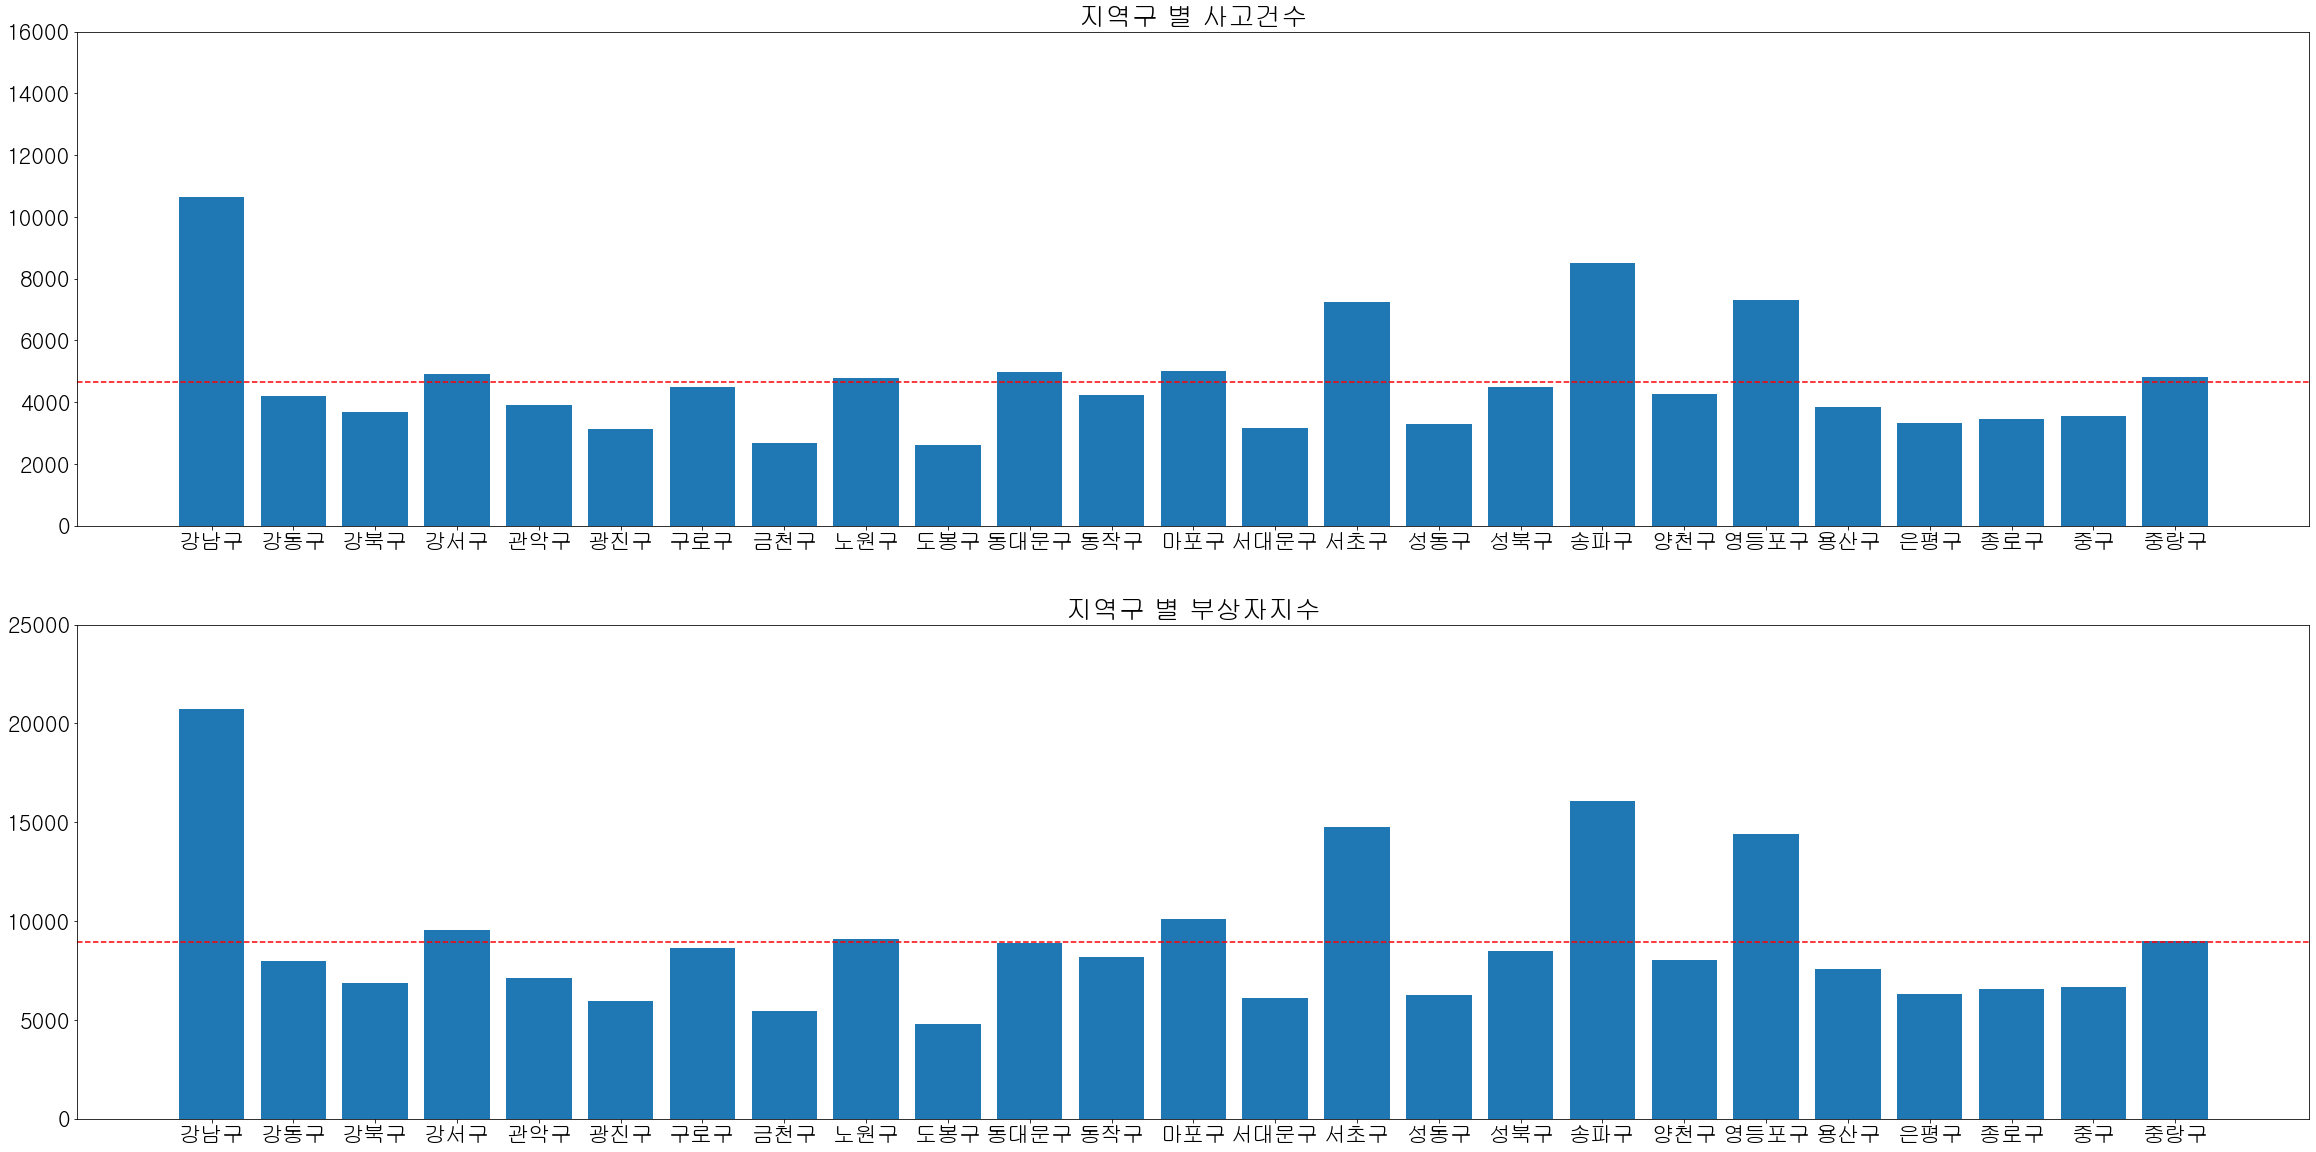

In [68]:
font_path = 'C:/windows/fonts/gulim.ttc'
fontprop = fm.FontProperties(fname=font_path, size=20).get_name()
rc('font', family=fontprop)

fig = plt.figure(figsize=(40,20))
plt.rcParams.update({'font.size': 22})

ax1 = fig.add_subplot(2,1,1)
acc_avg= taa['사고건수'].mean()
ax1.axhline(acc_avg, color='red',linestyle='--',label='Mean')
ax1.bar(label, taa['사고건수'])
ax1.set_title('지역구 별 사고건수')
ax1.set_ylim(0,16000)

ax2 = fig.add_subplot(2,1,2)
injury_avg= values['부상자지수'].mean()
ax2.axhline(injury_avg, color='red',linestyle='--',label='Mean')
ax2.bar(label, values['부상자지수'])
ax2.set_title('지역구 별 부상자지수')
ax2.set_ylim(0,25000)

<Figure size 1440x720 with 0 Axes>

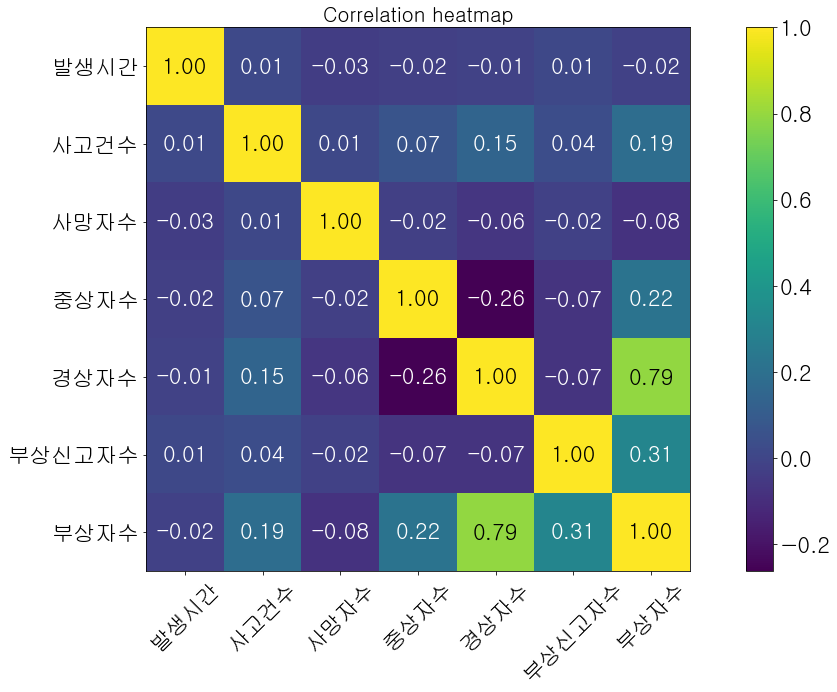

In [14]:
# font_path = 'C:/windows/fonts/gulim.ttc'
# fontprop = fm.FontProperties(fname=font_path, size=10).get_name()
# rc('font', family=fontprop)

ta_number = ta.select_dtypes(np.number) 
cm = np.corrcoef(ta_number.values.T)
plt.figure(figsize=(20,10))
hm = heatmap(cm, 
             figsize =(20,10),
             row_names = ta_number.columns,
             column_names = ta_number.columns
            )
plt.title('Correlation heatmap', fontsize=20)
plt.show()

In [4]:
# pip install googlemaps
# pip install folium
import googlemaps
import folium
from folium.plugins import HeatMap
import requests
import json

In [74]:
print(taa.index)

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='발생지_시군구')


In [72]:
print(Seoul_geo['features'][5]['geometry']['coordinates'])
print(Seoul_geo['features'][5]['properties']['name'])

[[[126.98223807916081, 37.509314966770326], [126.98241580381733, 37.50120029501884], [126.9832495184969, 37.49948552591205], [126.9871787157338, 37.49719505997539], [126.98500224966135, 37.49356837311327], [126.98367668291802, 37.473856492692086], [126.97901795539295, 37.47376525108475], [126.9725891850662, 37.472561363278125], [126.9634428120456, 37.48067931902171], [126.96443983219191, 37.48442261322104], [126.96291787066104, 37.48803272157808], [126.96329694970828, 37.4905835370787], [126.95881175306481, 37.48874989165474], [126.9559655046206, 37.48820165625994], [126.95396955055433, 37.48955250290043], [126.94922661389508, 37.49125437495649], [126.94373156012337, 37.48938843727846], [126.93844070234584, 37.4893532861132], [126.93669800083833, 37.49026778789087], [126.93346386636452, 37.49043826776755], [126.92981699800066, 37.49218420958284], [126.92869559665061, 37.49132126714011], [126.92639563063156, 37.48715979752876], [126.91916807529428, 37.48660606817164], [126.9153397977916

In [132]:
for i in range(0, len(taa)):
    for j in range(0,24):
        if (taa.index[i] == Seoul_geo['features'][j]['properties']['name']):
            taa['위도'][i] = Seoul_geo['features'][j]['geometry']['coordinates'][0][1][1]
            taa['경도'][i] = Seoul_geo['features'][j]['geometry']['coordinates'][0][1][0]
#     print(Seoul_geo['features'][j]['properties']['name'])    
#     print(Seoul_geo['features'][0]['geometry']['coordinates'])

<ipython-input-132-c76cda5c13bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taa['위도'][i] = Seoul_geo['features'][j]['geometry']['coordinates'][0][1][1]
<ipython-input-132-c76cda5c13bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taa['경도'][i] = Seoul_geo['features'][j]['geometry']['coordinates'][0][1][0]


In [133]:
taa

,경상자수,부상신고자수,사고건수,사망자수,중상자수,위도,경도
발생지_시군구,,,,,,,
강남구,11102,1312,10650,53,2694,37.522279,127.069070
강동구,3762,551,4203,42,1392,37.557222,127.118796
강북구,3630,216,3695,29,1060,37.676944,127.010731
강서구,4857,520,4915,43,1477,37.568277,126.859504
관악구,3610,423,3914,29,1098,37.469963,126.984637
광진구,2963,280,3145,29,988,37.568563,127.085533
구로구,4394,419,4494,38,1372,37.505412,126.831221
금천구,2763,279,2676,21,865,37.476520,126.902767
노원구,4730,532,4771,33,1322,37.617012,127.103620


In [102]:
taa['위도'] = 0.0
taa['경도'] = 0.0

In [139]:
SeoulMap = folium.Map(location=[37.541, 126.986],zoom_start=11)
# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
Seoul_geo = json.loads(c)
# folium.GeoJson(Seoul_geo, name='지역구').add_to(SeoulMap)

In [140]:
SeoulMap

In [147]:
taa[['위도','경도','사고건수']]

taa['구'] = taa.index

taa

,경상자수,부상신고자수,사고건수,사망자수,중상자수,위도,경도,구
발생지_시군구,,,,,,,,
강남구,11102,1312,10650,53,2694,37.522279,127.069070,강남구
강동구,3762,551,4203,42,1392,37.557222,127.118796,강동구
강북구,3630,216,3695,29,1060,37.676944,127.010731,강북구
강서구,4857,520,4915,43,1477,37.568277,126.859504,강서구
관악구,3610,423,3914,29,1098,37.469963,126.984637,관악구
광진구,2963,280,3145,29,988,37.568563,127.085533,광진구
구로구,4394,419,4494,38,1372,37.505412,126.831221,구로구
금천구,2763,279,2676,21,865,37.476520,126.902767,금천구
노원구,4730,532,4771,33,1322,37.617012,127.103620,노원구


In [152]:
folium.Choropleth(geo_data=geo_data, data=taa, colums('구', '사고건수'), key_on=
    'feature.properties.name', fill_color='Bupu').add_to(SeoulMap)

SyntaxError: positional argument follows keyword argument (<ipython-input-152-a803b9ac55b9>, line 1)

In [138]:
from folium.plugins import MarkerCluster

coords = taa[['위도', '경도']]
marker_cluster = MarkerCluster().add_to(SeoulMap)

for lat, long in zip(coords['위도'], coords['경도']):
     folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
SeoulMap